# NOTAS SERIES DE TIEMPO (Desde videos y desde el libro)

## Introducción:

\
En los siguientes notebooks encontrarás algunas notas sueltas que hago al ver videos y leer algunas cosas de Analisis de Series de Tiempo.

## ¿Qué es?
Es un conjunto de observaciones tomado de forma secuencial en el tiempo. (Acciones en la bolsa, señales sismicas, número de pasajeros movilizados en una aereolinea,...)

## Tipos de Analisis:
Descriptivo: nos permite entender las características de nuestra serie (Alta, baja demana).\
Explicativo o Inferencial: Se trata de encontrar la razón de los coportamientos hallados en el analisis descriptivo.
Predictivo(el rico): Trata de predecir el comportamiento de la serie a futuro.
(Vamos pa allá)

### Paso1 :(Establecer objetivos y recolectar datos)
Para poder analizar adecuadamente una serie temporal haciendo uso de analisis predictivo debemos tener claro lo que queremos hacer y establecer el objetivo adecuadamente para poder tomar los datos de forma correcta (y así establecer periodicidad y granuralidad).

### Paso2: (Analisis exploratorio)
Debemos observar como se comporta la serie respecto al tiempo y empezar a identificar patrones que pueden ser usados más adelante.
También haciendo uso de las componentes podemos llegar a encontrar patrones más sistemáticos o no sistemáticos (aleatorios)

#### Estacionariedad:
La mayoria de series temporales como paso previo para su analisis requieren evaluar su estacionariedad. Una serie estacionaria es aquella que no presenta cambios en el tiempo (Aunque halla ruido, si se aleja lo suficiente la serie ha seguido un patrón por mucho tiempo)\
Una serie no estacionaria es aquella que no presenta patrones a simple vista.




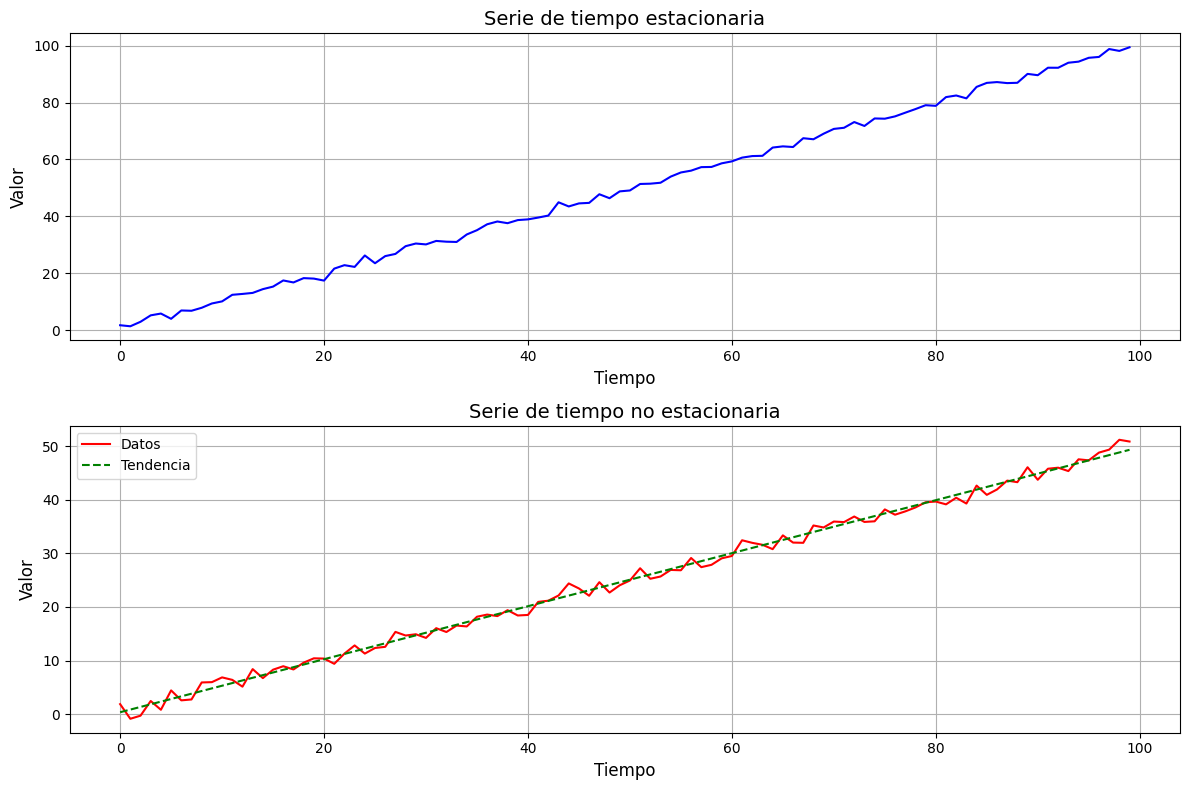

Prueba de estacionariedad para la serie de tiempo estacionaria:
Estadística de la prueba: 2.0712518547848826
Valor p: 0.9987586764999012
Valores críticos:
	1%: -3.5078527246648834
	5%: -2.895382030636155
	10%: -2.584823877658872

Prueba de estacionariedad para la serie de tiempo no estacionaria:
Estadística de la prueba: 0.7933875793062847
Valor p: 0.9915286779102706
Valores críticos:
	1%: -3.50434289821397
	5%: -2.8938659630479413
	10%: -2.5840147047458037


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generar serie de tiempo estacionaria
np.random.seed(0)
estacionaria = np.random.normal(loc=0, scale=1, size=100) + np.arange(100)

# Generar serie de tiempo no estacionaria
no_estacionaria = np.random.normal(loc=0, scale=1, size=100) + 0.5 * np.arange(100)

# Visualización de las series de tiempo
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(estacionaria, color='blue')
plt.title('Serie de tiempo estacionaria', fontsize=14)
plt.xlabel('Tiempo', fontsize=12)
plt.ylabel('Valor', fontsize=12)
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(no_estacionaria, color='red', label='Datos')
plt.title('Serie de tiempo no estacionaria', fontsize=14)
plt.xlabel('Tiempo', fontsize=12)
plt.ylabel('Valor', fontsize=12)
plt.grid(True)

# Añadir línea de tendencia
tendencia = np.polyfit(np.arange(len(no_estacionaria)), no_estacionaria, 1)
plt.plot(np.arange(len(no_estacionaria)), np.polyval(tendencia, np.arange(len(no_estacionaria))), color='green', linestyle='--', label='Tendencia')

plt.legend()

plt.tight_layout()
plt.show()

# Prueba de estacionariedad (Prueba de Dickey-Fuller)
def prueba_dickey_fuller(serie):
    resultado = sm.tsa.stattools.adfuller(serie)
    print('Estadística de la prueba:', resultado[0])
    print('Valor p:', resultado[1])
    print('Valores críticos:')
    for clave, valor in resultado[4].items():
        print(f'\t{clave}: {valor}')

# Realizar la prueba de Dickey-Fuller en ambas series de tiempo
print('Prueba de estacionariedad para la serie de tiempo estacionaria:')
prueba_dickey_fuller(estacionaria)
print('\nPrueba de estacionariedad para la serie de tiempo no estacionaria:')
prueba_dickey_fuller(no_estacionaria)


#### Autocorrelación:
La función de autocorrelación permite comparar los datos de la serie con ellos mismos (Discretizar el problema y verlo desde más arriba) para identificar patrones de estacionalidad o tendencias.

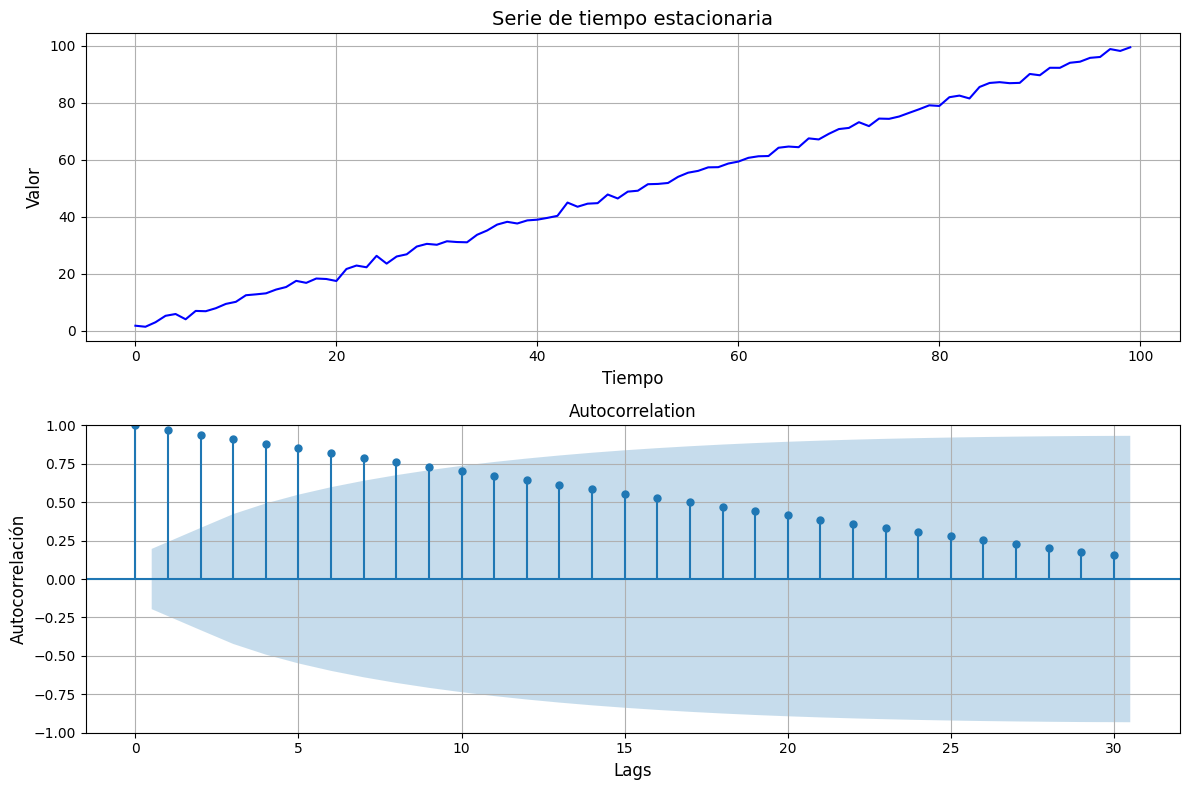

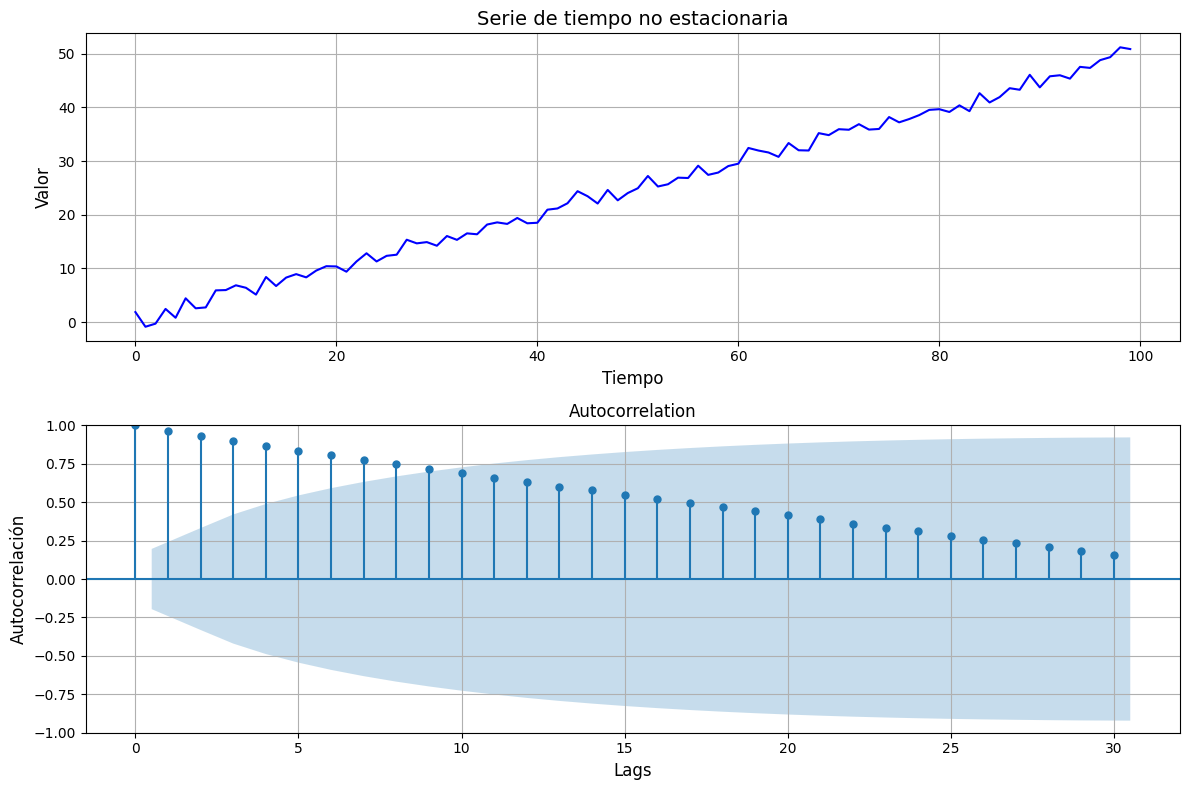

In [9]:
# Generar serie de tiempo estacionaria
np.random.seed(0)
estacionaria = np.random.normal(loc=0, scale=1, size=100) + np.arange(100)

# Generar serie de tiempo no estacionaria
no_estacionaria = np.random.normal(loc=0, scale=1, size=100) + 0.5 * np.arange(100)

# Función de autocorrelación
def plot_autocorrelation(serie, title):
    fig, ax = plt.subplots(2, 1, figsize=(12, 8))
    
    # Serie temporal
    ax[0].plot(serie, color='blue')
    ax[0].set_title(f'{title}', fontsize=14)
    ax[0].set_xlabel('Tiempo', fontsize=12)
    ax[0].set_ylabel('Valor', fontsize=12)
    ax[0].grid(True)
    
    # Función de autocorrelación
    sm.graphics.tsa.plot_acf(serie, lags=30, ax=ax[1])
    ax[1].set_xlabel('Lags', fontsize=12)
    ax[1].set_ylabel('Autocorrelación', fontsize=12)
    ax[1].grid(True)
    
    plt.tight_layout()
    plt.savefig("images/Notas1/"+ title)
    plt.show()
    

# Visualización y función de autocorrelación para la serie de tiempo estacionaria
plot_autocorrelation(estacionaria, 'Serie de tiempo estacionaria')

# Visualización y función de autocorrelación para la serie de tiempo no estacionaria
plot_autocorrelation(no_estacionaria, 'Serie de tiempo no estacionaria')


Con la prueba de estacionariedad y el calculo de autocorrelación ya nos permite empezar con el estudio y analisis de nuestra serie.

#### Datos faltantes:
Debemos tener en cuenta que algunas veces encontraremos series de tiempo que tienen huecos o datos faltantes.\
Tenemos alternativas como la imputación y eliminación para manejar esos datos.\
También podemos cambiar la resolución temporal sobremuestreando o submuestreando la serie usando técnicas de interpolación.

#### Horizonte de tiempo:
Debemos elegir el horizonte de tiempo antes de iniciar el analisis para hacer así también la resolución temporal de los datos

#### Partición de los datos:
Solo se aplica cuando hacemos analisis predictivo, a diferencia de lo que se hace en el mclr convencional debemos preservar la corelacion existente entre observaciones consecutivas dentro de la serie.\
La partición se hace usando dos subseries, una de entrenamiento y otra de validación (normalmente el horizonte de la validación es más cercano que el de entrenamiento).

## En el Analisis predictivo existen dos enfoques:
Basados en Modelos: Regresión Lineal, polinómica, Auto-regresivos (AR) y media movil. ARMA (Auto-regressive moving average), ARIMA (auto-regressive integrated moving average). \
Que normalmente se usan cuando la serie presenta estacionariedad o tendencias.
Basados en Datos: Aprende a identificar patrones en la serie MAchine Learning, Deep learning